In [ ]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

print('Imports Complete')

Imports Complete


In [ ]:
train = pd.read_csv('/content/sample_data/LSTM-Multivariate_pollution.csv')
train.head()

,date,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [ ]:
train.shape

(43800, 9)

In [ ]:
train.index = pd.to_datetime(train['date'], format='%Y.%m.%d %H:%M:%S')

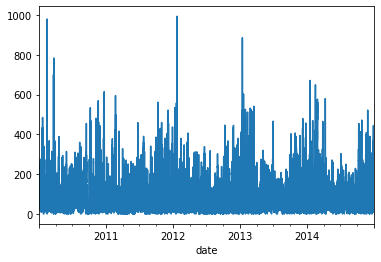

In [ ]:
poll = train['pollution']
poll.plot()

In [ ]:
train.wnd_dir.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [ ]:
def wind_encode(s):
    if s == "SE":
        return 1
    elif s == "NE":
        return 2
    elif s == "NW":
        return 3
    else:
        return 4

train["wind_dir"] = train["wnd_dir"].apply(wind_encode)
train = train.drop(["wnd_dir", 'date'], axis=1).head()
train.head()

,pollution,dew,temp,press,wnd_spd,snow,rain,wind_dir
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,1
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,1
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,1
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,1
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,1


In [ ]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE=5
X, y = df_to_X_y(poll, WINDOW_SIZE)
X.shape, y.shape

((43795, 5, 1), (43795,))

In [ ]:
X_train, y_train = X[:35000], y[:35000]
X_val, y_val = X[35000:], y[35000:65000]

In [ ]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10, verbose=1, callbacks=[cp])

Epoch 1/10
1094/1094 [==============================] - ETA: 0s - loss: 17178.0215 - root_mean_squared_error: 131.0650

1094/1094 [==============================] - 13s 10ms/step - loss: 17178.0215 - root_mean_squared_error: 131.0650 - val_loss: 18013.6035 - val_root_mean_squared_error: 134.2148
Epoch 2/10
1088/1094 [============================>.] - ETA: 0s - loss: 17127.7520 - root_mean_squared_error: 130.8730

1094/1094 [==============================] - 10s 9ms/step - loss: 17145.6309 - root_mean_squared_error: 130.9413 - val_loss: 17992.8516 - val_root_mean_squared_error: 134.1374
Epoch 3/10
1090/1094 [============================>.] - ETA: 0s - loss: 17120.3027 - root_mean_squared_error: 130.8446

1094/1094 [==============================] - 10s 9ms/step - loss: 17125.5352 - root_mean_squared_error: 130.8646 - val_loss: 17972.1758 - val_root_mean_squared_error: 134.0603
Epoch 4/10
1084/1094 [============================>.] - ETA: 0s - loss: 17139.5859 - root_mean_squared_error: 130.9182

1094/1094 [==============================] - 10s 9ms/step - loss: 17105.5605 - root_mean_squared_error: 130.7882 - val_loss: 17951.5000 - val_root_mean_squared_error: 133.9832
Epoch 5/10
1085/1094 [============================>.] - ETA: 0s - loss: 17066.0137 - root_mean_squared_error: 130.6369

1094/1094 [==============================] - 10s 9ms/step - loss: 17085.5488 - root_mean_squared_error: 130.7117 - val_loss: 17930.8516 - val_root_mean_squared_error: 133.9061
Epoch 6/10
1093/1094 [============================>.] - ETA: 0s - loss: 17064.5703 - root_mean_squared_error: 130.6314

1094/1094 [==============================] - 10s 10ms/step - loss: 17065.5566 - root_mean_squared_error: 130.6352 - val_loss: 17910.1836 - val_root_mean_squared_error: 133.8289
Epoch 7/10
1093/1094 [============================>.] - ETA: 0s - loss: 17049.1230 - root_mean_squared_error: 130.5723

1094/1094 [==============================] - 10s 9ms/step - loss: 17045.5625 - root_mean_squared_error: 130.5587 - val_loss: 17889.5293 - val_root_mean_squared_error: 133.7517
Epoch 8/10
1086/1094 [============================>.] - ETA: 0s - loss: 17007.6699 - root_mean_squared_error: 130.4135

1094/1094 [==============================] - 10s 9ms/step - loss: 17025.5742 - root_mean_squared_error: 130.4821 - val_loss: 17868.9453 - val_root_mean_squared_error: 133.6748
Epoch 9/10
1091/1094 [============================>.] - ETA: 0s - loss: 16997.3848 - root_mean_squared_error: 130.3740

1094/1094 [==============================] - 10s 9ms/step - loss: 17005.6484 - root_mean_squared_error: 130.4057 - val_loss: 17848.3887 - val_root_mean_squared_error: 133.5979
Epoch 10/10
1091/1094 [============================>.] - ETA: 0s - loss: 16960.6289 - root_mean_squared_error: 130.2330

1094/1094 [==============================] - 10s 9ms/step - loss: 16985.7930 - root_mean_squared_error: 130.3296 - val_loss: 17827.8730 - val_root_mean_squared_error: 133.5211


In [ ]:
model1 = load_model('model1/')
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions,
                                  'Actual':y_train})
train_results.head()

1094/1094 [==============================] - 3s 2ms/step


,Train Predictions,Actual
0,1.076372,109.0
1,1.076372,105.0
2,1.076372,124.0
3,1.076372,120.0
4,1.076372,132.0


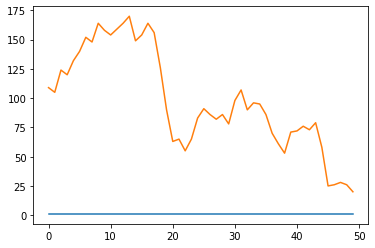

In [ ]:
plt.plot(train_results['Train Predictions'][:50])
plt.plot(train_results['Actual'][:50])

In [ ]:
rmse = np.sqrt(mse(y_train, train_predictions))
print("Validation RMSE ="  ,rmse)

Validation RMSE = 130.29139827923206


In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions,
                                  'Actual':y_val})
val_results.head()

275/275 [==============================] - 1s 5ms/step


,Val Predictions,Actual
0,1.076372,27.0
1,1.076372,25.0
2,1.076372,25.0
3,1.076372,25.0
4,1.076372,25.0


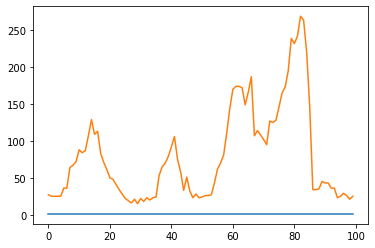

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actual'][:100])

In [ ]:
rmse = np.sqrt(mse(y_val, val_predictions))
print("Validation RMSE ="  ,rmse)

Validation RMSE = 133.52108830483525
